In [225]:
import pandas as pd
% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração gráfica.
sns.set(style="darkgrid");

labels = ['id', 'sobrevivente', 'classe', 'nome', 'sexo', 'idade', 'qtd_irmao_conjuge',
          'qtd_pai_filho', 'tarifa_passageiro', 'bilhete', 'cabine', 'porto_embarque'];
df = pd.read_csv('titanic-data-6.csv', header=0, index_col='id', names=labels);

In [186]:
# Verificando quantidade de registros, quantidade de colunas, colunas que possui valores nulos e tipo de dado de cada coluna.
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
sobrevivente         891 non-null int64
classe               891 non-null int64
nome                 891 non-null object
sexo                 891 non-null object
idade                714 non-null float64
qtd_irmao_conjuge    891 non-null int64
qtd_pai_filho        891 non-null int64
tarifa_passageiro    891 non-null object
bilhete              891 non-null float64
cabine               204 non-null object
porto_embarque       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [187]:
# Verificando registros duplicados.
sum(df.duplicated())

0

In [188]:
# Verificando visualmente alguns registros.
df.head()

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,tarifa_passageiro,bilhete,cabine,porto_embarque
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
## Limpeza de dados ##

# Substituindo dados para uma melhor leitura. Origem das informações: https://www.kaggle.com/c/titanic/data
df['sobrevivente'] = df['sobrevivente'].replace([0, 1], ['não', 'sim']);
df['sexo'] = df['sexo'].replace(['male', 'female'], ['homem', 'mulher']);
df['porto_embarque'] = df['porto_embarque'].replace(['C', 'Q', 'S'], ['Cherbourg', 'Queenstown', 'Southampton']);

# Tratando os valores nulos não numéricos.
df["cabine"].fillna("não registrado", inplace = True);
df["porto_embarque"].fillna("não registrado", inplace = True);

# Preenchendo as idades nulas com a média da idade dos passageiros.
df['idade'] = df['idade'].fillna(df['idade'].mean());

In [190]:
df.head()

,sobrevivente,classe,nome,sexo,idade,qtd_irmao_conjuge,qtd_pai_filho,tarifa_passageiro,bilhete,cabine,porto_embarque
id,,,,,,,,,,,
1,não,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,não registrado,Southampton
2,sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,sim,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,não registrado,Southampton
4,sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,Southampton
5,não,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,não registrado,Southampton


In [191]:
df.describe()

,classe,idade,qtd_irmao_conjuge,qtd_pai_filho,bilhete
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


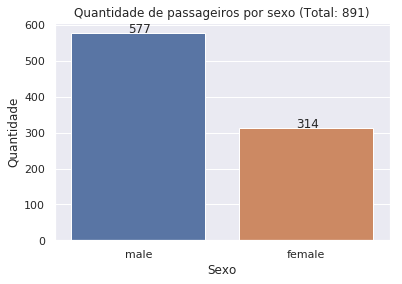

<Figure size 1440x1440 with 0 Axes>

In [227]:
grafico = sns.countplot(data=df, x='sexo');
plt.title('Quantidade de passageiros por sexo' + ' (Total: ' + str(len(df)) + ')');
plt.ylabel('Quantidade');
plt.xlabel('Sexo');
plt.figure(figsize=(20,20))
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.06, posicao_topo.y1 + 1));

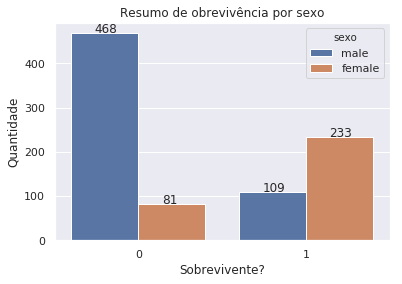

In [228]:
grafico = sns.countplot(data=df, x='sobrevivente', hue='sexo');
plt.title('Resumo de obrevivência por sexo');
plt.ylabel('Quantidade');
plt.xlabel('Sobrevivente?');
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.06, posicao_topo.y1 + 1));

Avaliação: Identificado que a quantidade de homens a bordo era bem maior do que a de mulheres e mesmo assim sobreviveram mais mulheres do que homens.

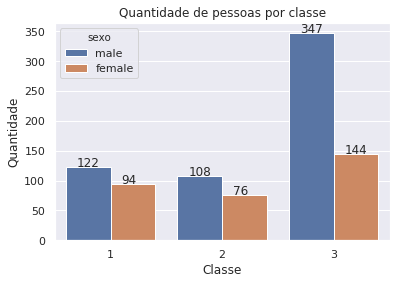

In [233]:
grafico = sns.countplot(x='classe', hue='sexo', data=df);
plt.title('Quantidade de pessoas por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.1, posicao_topo.y1 + 1));

Avaliação: Identificado que a maioria dos homens e mulheres estavam na terceira classe e que a quantidade de homens na terceira classe era quase o triplo em relação as outras classes do navio.


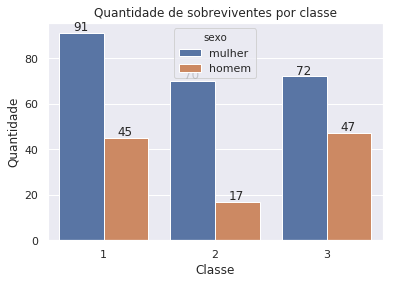

In [195]:
grafico = sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "sim"'));
plt.title('Quantidade de sobreviventes por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.075, posicao_topo.y1 + 1));

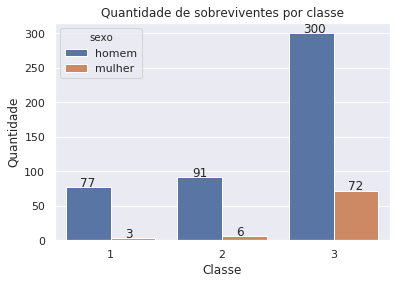

In [196]:
grafico = sns.countplot(x='classe', hue='sexo', data=df.query('sobrevivente == "não"'));
plt.title('Quantidade de sobreviventes por classe');
plt.ylabel('Quantidade');
plt.xlabel('Classe');

for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.07, posicao_topo.y1 + 1));

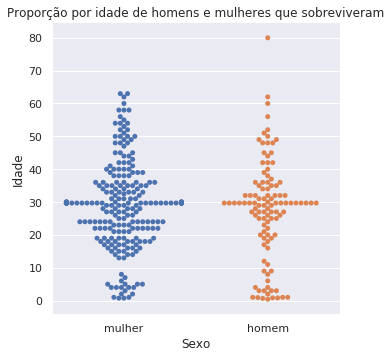

In [197]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "sim"'));
plt.title('Proporção por idade de homens e mulheres que sobreviveram');
plt.ylabel('Idade');
plt.xlabel('Sexo');

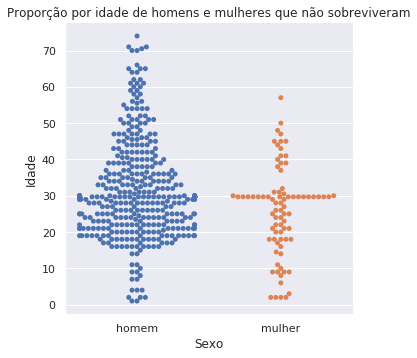

In [198]:
sns.catplot(x='sexo', y='idade', kind='swarm', data=df.query('sobrevivente == "não"'));
plt.title('Proporção por idade de homens e mulheres que não sobreviveram');
plt.ylabel('Idade');
plt.xlabel('Sexo');

Avaliação: Identificado visualmente que morreram muitas mulheres com 30 anos de idade e que a maior concentração de homens mortos foi entre 20 aos 30 anos de idade. Comparando com a proporção de sobreviventes, foi identificado um volume maior de sobreviventes "crianças".

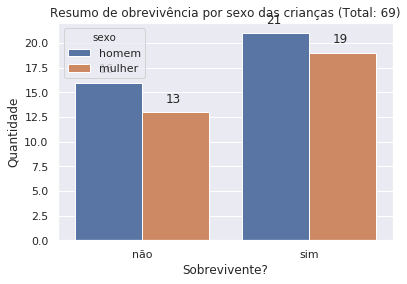

In [223]:
criancas = df.query('idade <= 12')

grafico = sns.countplot(data=criancas, x='sobrevivente', hue='sexo');
plt.title('Resumo de obrevivência por sexo das crianças (Total: ' + str(len(criancas)) + ')');
plt.ylabel('Quantidade');
plt.xlabel('Sobrevivente?');
           
for barra in grafico.patches:
    posicao_topo = barra.get_bbox();
    grafico.annotate("{:.0f}".format(posicao_topo.y1 + posicao_topo.y0),
                     ((posicao_topo.x0 + posicao_topo.x1)/2 - 0.06, posicao_topo.y1 + 1));

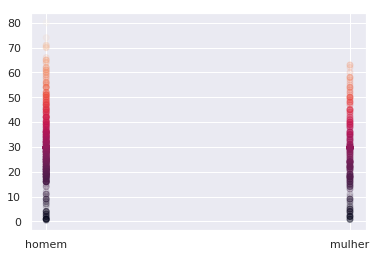

In [199]:
fig, ax = plt.subplots()

ax.scatter(x='sexo', y='idade', data=df, c='idade', alpha=.15);